All of the following prompts used with ChatGPT-4o

***Prompt***: can you make a markdown cell with a title about our first day of data science class in python, followed by Dr. Amish Mishra being the author for the class MAT 311 with a little intro to the notebook which is about Credit Card Fraud Detection dataset and what the rest of the notebook will be about


# First Day of Data Science Class in Python

**Author**: Dr. Amish Mishra  
**Course**: MAT 311
**Updated**: August 1, 2024

---
## Introduction

Welcome to the first day of our Data Science class in Python! In this notebook, we will explore the **Credit Card Fraud Detection** dataset. This dataset contains transactions made by credit card holders, with the goal of identifying potentially fraudulent transactions.

Throughout this notebook, we will:

1. Load and preprocess the dataset.
2. Perform exploratory data analysis (EDA) to uncover patterns and anomalies.
3. Apply machine learning models to detect fraudulent transactions.
4. Evaluate model performance using appropriate metrics.

Let's get started on this exciting journey into the world of data science!


***Prompt:*** ok great! now can you give me another markdown cell about the context of the data. the data came from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data and could you say that and then give a chart of the features and what they are?


## Context of the Data

The data we will analyze comes from the [Credit Card Fraud Detection dataset on Kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data). This dataset is highly imbalanced, with most transactions being legitimate and only a small fraction marked as fraudulent.

Below is a table of the dataset's features and their descriptions:

| Feature                         | Description                                                |
|---------------------------------|------------------------------------------------------------|
| `distance_from_home`            | Distance between the transaction location and the cardholder's home |
| `distance_from_last_transaction`| Distance between the current transaction and the previous one |
| `ratio_to_median_purchase_price`| Ratio of the transaction amount to the median purchase price |
| `repeat_retailer`               | Indicates if the transaction occurred at a repeat retailer |
| `used_chip`                     | Indicates if the transaction used a chip-enabled card      |
| `used_pin_number`               | Indicates if a PIN number was used during the transaction  |
| `online_order`                  | Indicates if the transaction was made online               |
| `fraud`                         | Indicates if the transaction is fraudulent (1) or legitimate (0) |

This context provides us with the necessary foundation to understand and work with the dataset effectively.


***Prompt:*** ok good, now could you create a markdown above a python cell that imports libraries. I want to import pandas, seaborn, matplotlib.pyplot, pyplotly.express, train_test_split, StandardScaler, KNeighborsClassifier, monfusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

## Importing Libraries

Before diving into the data, we need to import the necessary libraries that will help us preprocess, analyze, and model the data.


In [1]:
import pandas as pd  # Data manipulation and analysis
import seaborn as sns  # Data visualization, particularly for statistical graphics
import matplotlib.pyplot as plt  # General-purpose plotting
import plotly.express as px  # Interactive data visualization
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier for machine learning
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score  # Evaluation metrics


***Prompt***: I want to import the dataset "card_transdata.csv" using pandas and then print the head. could you give me a sample markdown header for that code?

## Loading the Dataset

In this section, we will load the dataset `card_transdata.csv` using pandas and preview its first few rows to understand its structure.


In [2]:
# Load the dataset
transaction_data_raw = pd.read_csv("card_transdata.csv")

# Display the first five rows of the dataset
print(transaction_data_raw.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  


***Prompt***: good, now in separate cells, print the shape, .info() and describe the dataframe

In [3]:
# Print the shape of the dataset
print(transaction_data_raw.shape)

(999, 8)


In [4]:
# Display dataset information
print(transaction_data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB
None


In [5]:
# Display statistical summary of the dataset
print(transaction_data_raw.describe())

       distance_from_home  distance_from_last_transaction  \
count          999.000000                      996.000000   
mean            26.876607                        5.437319   
std             63.899697                       35.668094   
min              0.104184                        0.001448   
25%              3.990543                        0.306441   
50%             10.340321                        0.958539   
75%             25.393952                        3.137259   
max            965.910612                      990.070315   

       ratio_to_median_purchase_price  repeat_retailer   used_chip  \
count                      997.000000       992.000000  995.000000   
mean                         1.655069         0.892137    0.313568   
std                          2.351386         0.310364    0.464176   
min                          0.016933         0.000000    0.000000   
25%                          0.468123         1.000000    0.000000   
50%                          0

***Prompt***: ok now create a new section for data wrangling. i want you to find the sum of null values, and then give a markdown explanation of what we could do with those null values, followed by a python chunk that drops the null values and then prints the shape of the dataframe and the head

## Data Wrangling

Before we proceed with analysis and modeling, it's essential to handle any missing values in the dataset. Missing values can affect model performance and the reliability of results. We will first check the number of null values in each column and then decide on an appropriate strategy to handle them.

In [6]:
# Check the sum of null values in each column
print("Null values in each column:")
print(transaction_data_raw.isnull().sum())

Null values in each column:
distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


### Handling Null Values
Options for dealing with null values include:
- **Imputation**: Replacing null values with the mean, median, or mode of the column, or using more advanced techniques.
- **Deletion**: Removing rows or columns with null values, which is suitable if the proportion of missing data is small.
- **Leaving Nulls**: In some cases, models can handle null values directly.

For this dataset, we will drop rows with null values to simplify preprocessing.


In [7]:
# Drop rows with null values
transaction_data_cleaned = transaction_data_raw.dropna().copy()

In [8]:
# Print the new shape and preview the cleaned dataset
print("\nShape of the cleaned dataset:", transaction_data_cleaned.shape)
print("\nFirst 5 rows of the cleaned dataset:")
print(transaction_data_cleaned.head())


Shape of the cleaned dataset: (977, 8)

First 5 rows of the cleaned dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   
6            3.724019                        0.956838   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   
5                        0.064768              1.0        0.0   
6                        0.278465              1.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  
5              0.0  

***Prompt***: ok great. now i want a new section for visualizing the data. I want a seaborn countplot of the 'fraud' column of this new dataframe with a title

## Visualizing the Data

To better understand the distribution of the `fraud` column, we will create a count plot. This visualization will help us see the balance between fraudulent and legitimate transactions in the dataset.


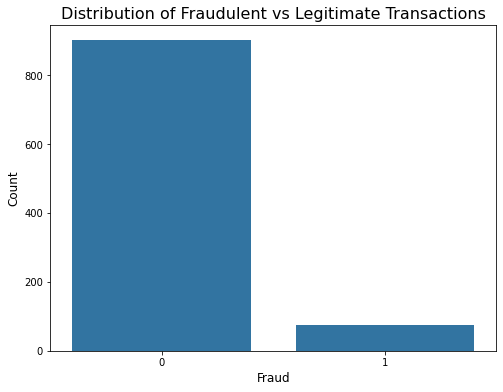

In [9]:
# Visualize the distribution of the 'fraud' column
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='fraud')
plt.title('Distribution of Fraudulent vs Legitimate Transactions', fontsize=16)
plt.xlabel('Fraud', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


***Prompt***: great. can you do the same thing for 'used_pin_number', 'repeat_retailer','used chip', 'online_order' 

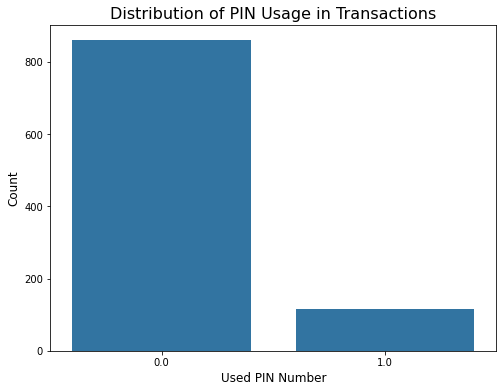

In [10]:
# Visualize the distribution of the 'used_pin_number' column
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='used_pin_number')
plt.title('Distribution of PIN Usage in Transactions', fontsize=16)
plt.xlabel('Used PIN Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


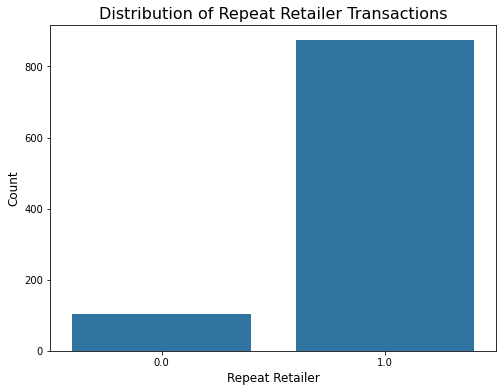

In [11]:
# Visualize the distribution of the 'repeat_retailer' column
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='repeat_retailer')
plt.title('Distribution of Repeat Retailer Transactions', fontsize=16)
plt.xlabel('Repeat Retailer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

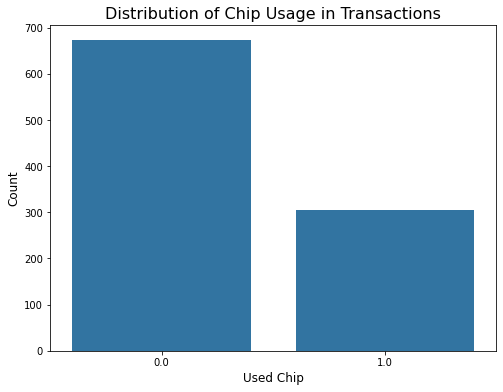

In [12]:
# Visualize the distribution of the 'used_chip' column
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='used_chip')
plt.title('Distribution of Chip Usage in Transactions', fontsize=16)
plt.xlabel('Used Chip', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

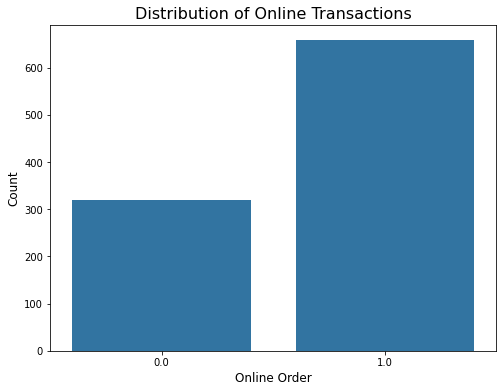

In [13]:
# Visualize the distribution of the 'online_order' column
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='online_order')
plt.title('Distribution of Online Transactions', fontsize=16)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

***Prompt***: ok now i want some histograms, still using seaborn. Can you plot the distribution of 'distance_from_last_transaction' with 30 bins, and also 'ratio_to_median_purchase_price' and 'distance_from_home' 

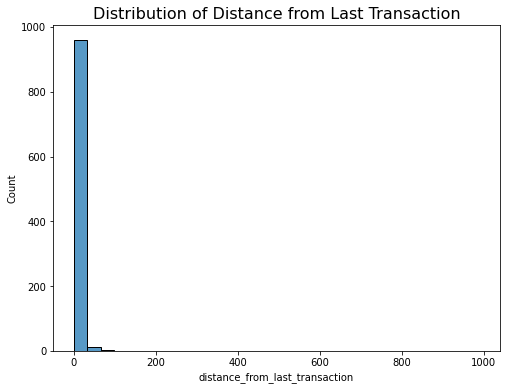

In [14]:
# Plot the distribution of 'distance_from_last_transaction'
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['distance_from_last_transaction'], bins=30)
plt.title('Distribution of Distance from Last Transaction', fontsize=16)
plt.show()

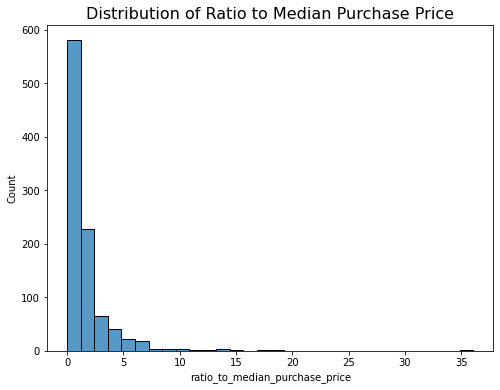

In [15]:
# Plot the distribution of 'ratio_to_median_purchase_price'
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['ratio_to_median_purchase_price'], bins=30)
plt.title('Distribution of Ratio to Median Purchase Price', fontsize=16)
plt.show()

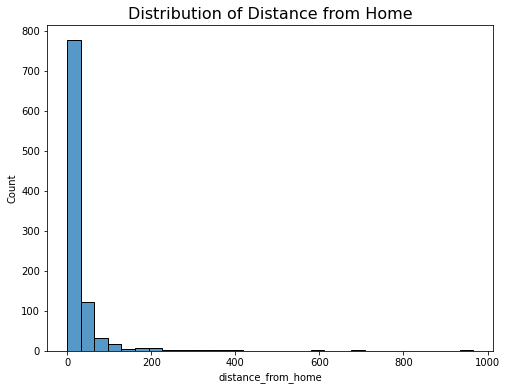

In [16]:
# Plot the distribution of 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data_cleaned['distance_from_home'], bins=30)
plt.title('Distribution of Distance from Home', fontsize=16)
plt.show()

***Prompt***: thank you very much. now i want a section for better visualizations and plot by fraud and non-fraud, so create a markdown for that and then make a countplot of  'used_pin_number'

## Better Visualizations: Grouped by Fraud and Non-Fraud

To gain deeper insights, we will group visualizations by the `fraud` column. This allows us to compare the distributions and occurrences of different features between fraudulent and legitimate transactions. 

Let’s start by visualizing the `used_pin_number` column grouped by fraud status.


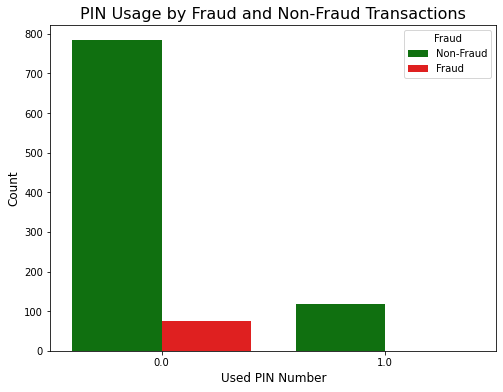

In [17]:
# Count plot of 'used_pin_number' grouped by 'fraud' with green and red palette
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='used_pin_number', hue='fraud', palette=['green', 'red'])
plt.title('PIN Usage by Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Used PIN Number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.show()

***Prompt***: ok great, now could you do the same column but as a percentage plot. i want the fraud and non fraud in the same bar but colored different so that it is a percentage of the total transactions

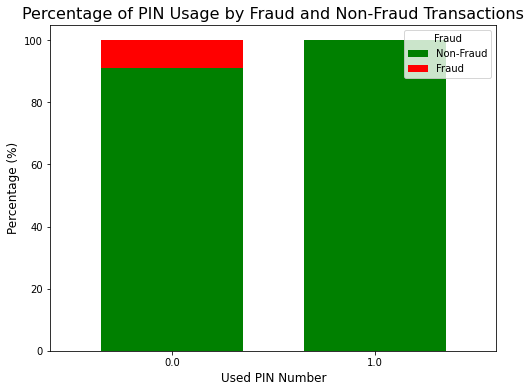

In [18]:
# Calculate percentages for fraud and non-fraud within each 'used_pin_number' category
percentages = (
    transaction_data_cleaned.groupby('used_pin_number')['fraud']
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
)

# Create the plot
percentages.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6),
    width=0.7
)

# Add title and labels
plt.title('Percentage of PIN Usage by Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Used PIN Number', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.xticks(rotation=0)
plt.show()

***Prompt***: ok now could you do the same thing, a countplot and percentage plot for the column "repeat_retailer", and "used_chip" and 'online_order' all in different python cells

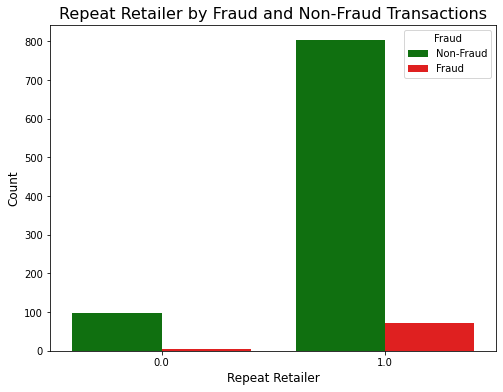

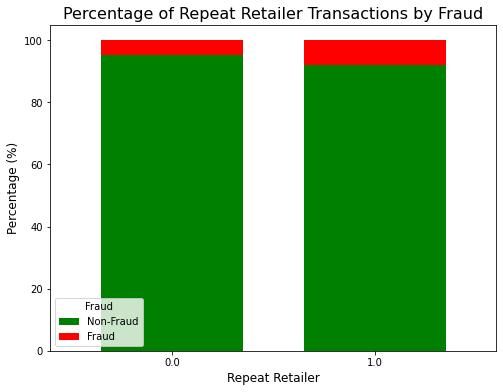

In [19]:
# Count plot of 'repeat_retailer' grouped by 'fraud'
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='repeat_retailer', hue='fraud', palette=['green', 'red'])
plt.title('Repeat Retailer by Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Repeat Retailer', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.show()

# Percentage plot of 'repeat_retailer' grouped by 'fraud'
percentages = (
    transaction_data_cleaned.groupby('repeat_retailer')['fraud']
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
)

percentages.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6),
    width=0.7
)

plt.title('Percentage of Repeat Retailer Transactions by Fraud', fontsize=16)
plt.xlabel('Repeat Retailer', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.xticks(rotation=0)
plt.show()

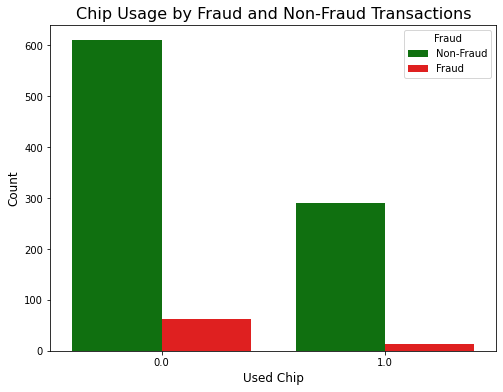

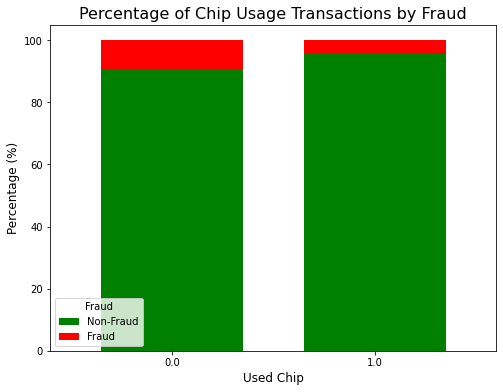

In [20]:
# Count plot of 'used_chip' grouped by 'fraud'
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='used_chip', hue='fraud', palette=['green', 'red'])
plt.title('Chip Usage by Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Used Chip', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.show()

# Percentage plot of 'used_chip' grouped by 'fraud'
percentages = (
    transaction_data_cleaned.groupby('used_chip')['fraud']
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
)

percentages.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6),
    width=0.7
)

plt.title('Percentage of Chip Usage Transactions by Fraud', fontsize=16)
plt.xlabel('Used Chip', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.xticks(rotation=0)
plt.show()


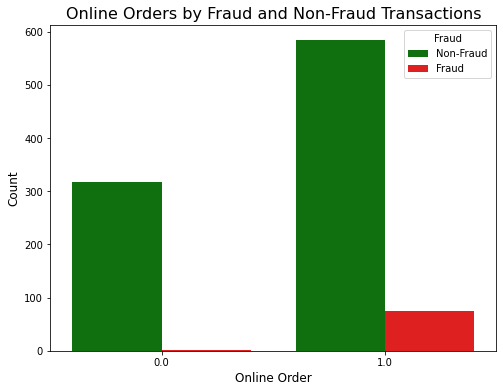

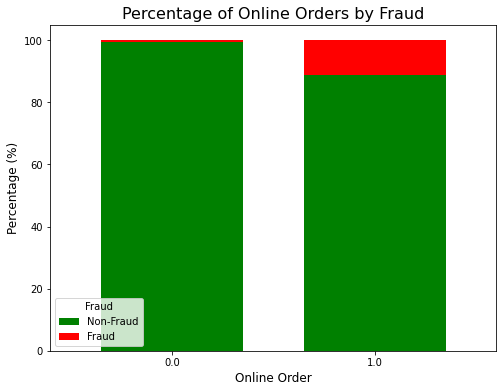

In [21]:
# Count plot of 'online_order' grouped by 'fraud'
plt.figure(figsize=(8, 6))
sns.countplot(data=transaction_data_cleaned, x='online_order', hue='fraud', palette=['green', 'red'])
plt.title('Online Orders by Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.show()

# Percentage plot of 'online_order' grouped by 'fraud'
percentages = (
    transaction_data_cleaned.groupby('online_order')['fraud']
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
)

percentages.plot(
    kind='bar',
    stacked=True,
    color=['green', 'red'],
    figsize=(8, 6),
    width=0.7
)

plt.title('Percentage of Online Orders by Fraud', fontsize=16)
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=10)
plt.xticks(rotation=0)
plt.show()


***Prompt***: thank you very much... i now want a new section for bivariate visualizatons that gives a lil intro to that and making scatterplots. i want a scatterplot of 'distance_from_home' vs 'ratio_to_median_price' colored by fraud, and then a scatterplot of 'distance_from_home' vs 'distance_from_last_transaction' and last a scatterplot of 'distance_from_last_transaction' vs 'ratio_to_median_purchase_price' 

## Bivariate Visualizations

In this section, we will explore relationships between pairs of numerical features in the dataset using scatterplots. These visualizations will help us understand how different features interact with each other and whether there are noticeable patterns or separations between fraudulent and legitimate transactions.


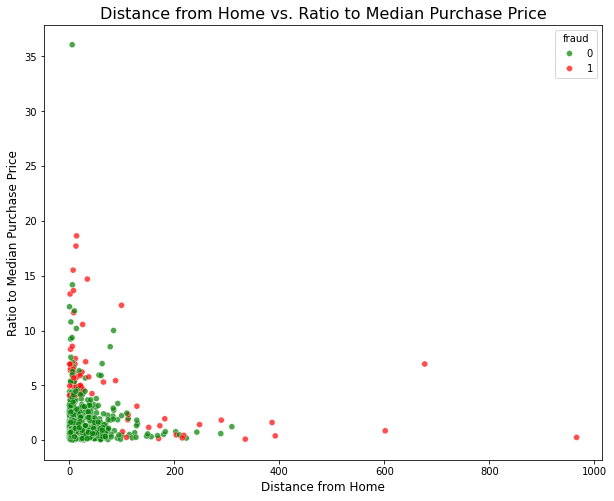

In [22]:
# Scatterplot: distance_from_home vs. ratio_to_median_purchase_price, colored by fraud
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette=['green', 'red'],
    alpha=0.7
)
plt.title('Distance from Home vs. Ratio to Median Purchase Price', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Ratio to Median Purchase Price', fontsize=12)
plt.show()

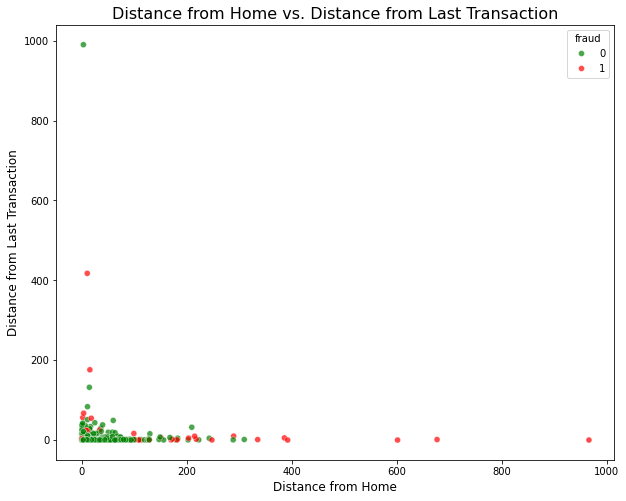

In [23]:
# Scatterplot: distance_from_home vs. distance_from_last_transaction, colored by fraud
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_home',
    y='distance_from_last_transaction',
    hue='fraud',
    palette=['green', 'red'],
    alpha=0.7
)
plt.title('Distance from Home vs. Distance from Last Transaction', fontsize=16)
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Distance from Last Transaction', fontsize=12)
plt.show()


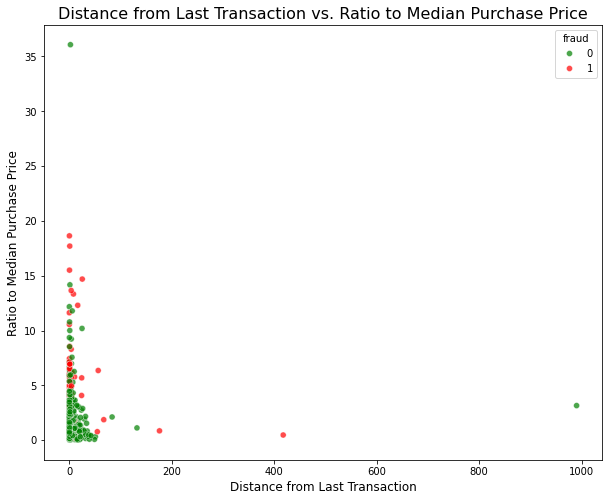

In [24]:
# Scatterplot: distance_from_last_transaction vs. ratio_to_median_purchase_price, colored by fraud
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=transaction_data_cleaned,
    x='distance_from_last_transaction',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette=['green', 'red'],
    alpha=0.7
)
plt.title('Distance from Last Transaction vs. Ratio to Median Purchase Price', fontsize=16)
plt.xlabel('Distance from Last Transaction', fontsize=12)
plt.ylabel('Ratio to Median Purchase Price', fontsize=12)

plt.show()


***Prompt***: good work :) now i actually want to make train/test sets. can you make a new section for predicting if a transaction is fraud. and give an intro to saying we want 20% of the data as testing data and then create a python chunk that does that and then prints X_train, y_train, and X_test, y_test in different cells


## Predicting Fraudulent Transactions

In this section, we aim to predict whether a transaction is fraudulent based on the features in the dataset. To achieve this, we will split the data into training and testing sets, with 80% of the data used for training the model and 20% reserved for testing its performance.

We will then separate the features (independent variables) and the target variable (`fraud`) for model training and evaluation.


In [25]:
# Define features (X) and target (y)
X = transaction_data_cleaned.drop(columns=['fraud'])  # All features except 'fraud'
y = transaction_data_cleaned['fraud']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Print X_train
print("X_train:")
print(X_train)

# Print y_train
print("\ny_train:")
print(y_train)

X_train:
     distance_from_home  distance_from_last_transaction  \
954           39.904167                        0.367448   
143            2.660649                        0.657162   
643           48.902727                        0.205816   
15           179.665148                        0.120920   
793          676.702348                        1.209733   
..                  ...                             ...   
685            5.916343                        5.099247   
722           23.517527                        3.513485   
173            3.273426                        1.056948   
499            7.387696                        1.598827   
593            5.630854                        1.626769   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
954                        0.260833              1.0        1.0   
143                        3.837860              1.0        0.0   
643                        1.307000              1.0        0.0   
15            

In [27]:
# Print X_test
print("X_test:")
print(X_test)

# Print y_test
print("\ny_test:")
print(y_test)

X_test:
     distance_from_home  distance_from_last_transaction  \
782            0.701100                        0.540487   
51            43.281314                        3.367793   
197            4.586564                        3.365070   
550            4.403263                        0.173726   
412          965.910612                        0.023604   
..                  ...                             ...   
436            6.498016                        0.228995   
868            9.258344                        0.633609   
65            17.797888                        1.395508   
743            5.599947                        2.477098   
390           12.391271                        1.658017   

     ratio_to_median_purchase_price  repeat_retailer  used_chip  \
782                        1.754568              0.0        0.0   
51                         0.676058              1.0        1.0   
197                        2.454288              1.0        0.0   
550            

***Prompt***: good work. now i want to create a model in a new section that alwaus says that a transaction is not fraud

## Baseline Model: Always Predict Non-Fraud

As a baseline for comparison, we will create a simple model that always predicts a transaction as **non-fraudulent** (class `0`). This baseline helps us understand the performance of a naive approach and provides a benchmark for evaluating more sophisticated models.


In [28]:
# Create a baseline model that always predicts 'non-fraud' (0)
y_pred_never_fraud = [0] * len(y_test)  # Predict 0 for all test samples

# Print the first 100 predictions
print("First 100 Baseline Predictions (y_pred_never_fraud):")
print(y_pred_never_fraud[:100])

First 100 Baseline Predictions (y_pred_never_fraud):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


***Prompt***: ok now i want a new section for creating a KNN model. initialize, fit and predict with KNeighborsClassifier and print the first 100 predictions

## K-Nearest Neighbors (KNN) Model

In this section, we will use the K-Nearest Neighbors (KNN) algorithm to predict fraudulent transactions. KNN is a simple, non-parametric, and instance-based learning algorithm that classifies data points based on their proximity to other points in the feature space.

Steps:
1. Initialize the `KNeighborsClassifier`.
2. Fit the model using the training data (`X_train` and `y_train`).
3. Predict fraud status on the testing data (`X_test`).
4. Print the first 100 predictions.


In [29]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3) 

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_knn = knn_model.predict(X_test)

# Print the first 100 predictions
print("First 100 KNN Predictions:")
print(y_pred_knn[:100])

First 100 KNN Predictions:
[0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


***Prompt***: good work that's just what I wanted. can you make a new section for evaluation of the models and create a confusion matrix and heatmap for the y_pred_never_fraud model and then print the classification report. then could you do the same thing for y_pred_knn

## Model Evaluation

In this section, we will evaluate the performance of our models using a confusion matrix and a classification report. These tools help us understand the strengths and weaknesses of each model.

1. **Confusion Matrix**: Provides a summary of prediction results on a classification problem.
2. **Classification Report**: Includes metrics such as precision, recall, F1-score, and support.

We will evaluate:
- The baseline model (`y_pred_never_fraud`).
- The K-Nearest Neighbors (KNN) model (`y_pred_knn`).


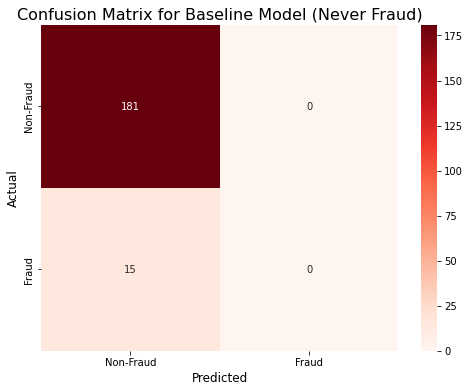

Classification Report for Baseline Model (Never Fraud):
              precision    recall  f1-score   support

   Non-Fraud       0.92      1.00      0.96       181
       Fraud       1.00      0.00      0.00        15

    accuracy                           0.92       196
   macro avg       0.96      0.50      0.48       196
weighted avg       0.93      0.92      0.89       196



In [30]:
# Confusion matrix for y_pred_never_fraud
cm_never_fraud = confusion_matrix(y_test, y_pred_never_fraud)

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_never_fraud, annot=True, fmt="d", cmap="Reds", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Baseline Model (Never Fraud)', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Classification report for y_pred_never_fraud
print("Classification Report for Baseline Model (Never Fraud):")
print(classification_report(y_test, y_pred_never_fraud, target_names=['Non-Fraud', 'Fraud'], zero_division=1))


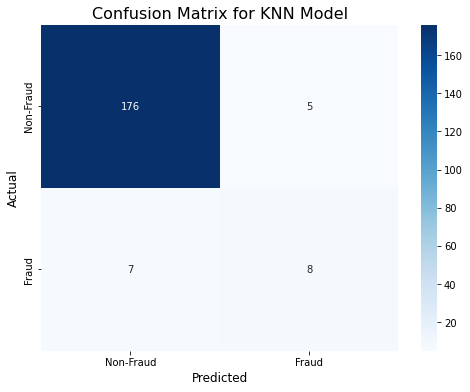

Classification Report for KNN Model:
              precision    recall  f1-score   support

   Non-Fraud       0.96      0.97      0.97       181
       Fraud       0.62      0.53      0.57        15

    accuracy                           0.94       196
   macro avg       0.79      0.75      0.77       196
weighted avg       0.94      0.94      0.94       196



In [31]:
# Confusion matrix for y_pred_knn
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for KNN Model', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Classification report for y_pred_knn
print("Classification Report for KNN Model:")
print(classification_report(y_test, y_pred_knn, target_names=['Non-Fraud', 'Fraud'], zero_division=1))


***Prompt***: now could you create a new section for comparing the two model's performance, and create a python chunk that calculates accuracy, precision, recall, and f1 score for the never fraud and knn models

## Comparing Model Performance

In this section, we will compare the performance of the baseline model (`y_pred_never_fraud`) and the K-Nearest Neighbors (KNN) model (`y_pred_knn`) using the following metrics:

1. **Accuracy**: Overall correctness of the model.
2. **Precision**: Correct positive predictions out of all positive predictions made.
3. **Recall**: Correct positive predictions out of all actual positives.
4. **F1 Score**: Harmonic mean of precision and recall, balancing the two metrics.


In [32]:
# Calculate metrics for the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_never_fraud)
precision_baseline = precision_score(y_test, y_pred_never_fraud, zero_division=0)
recall_baseline = recall_score(y_test, y_pred_never_fraud)
f1_baseline = f1_score(y_test, y_pred_never_fraud)

# Calculate metrics for the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

***Prompt***: after calculating could you make 3 lists for those values, one list with the name of the metric, and the other two with the values for the two models in the same order. this is to prepare for visualization. then make a dataframe of those lists

In [33]:
# Create lists for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
baseline_values = [accuracy_baseline, precision_baseline, recall_baseline, f1_baseline]
knn_values = [accuracy_knn, precision_knn, recall_knn, f1_knn]

# Create a DataFrame
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'Baseline Model': baseline_values,
    'KNN Model': knn_values
})

***Prompt***: then plot a bar chart of those scores for each model using subplots

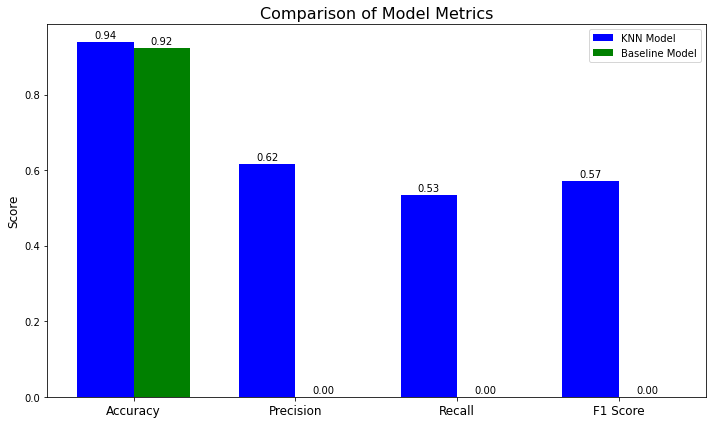

In [34]:
import numpy as np
# Create a bar chart with subplots for each metric
x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each model
ax.bar(x - width/2, knn_values, width, label='KNN Model', color='blue')
ax.bar(x + width/2, baseline_values, width, label='Baseline Model', color='green')

# Add titles and labels
ax.set_title('Comparison of Model Metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.legend(fontsize=10)

# Add value annotations on top of bars
for i in range(len(metrics)):
    ax.text(x[i] - width/2, knn_values[i] + 0.01, f'{knn_values[i]:.2f}', ha='center', fontsize=10, color='black')
    ax.text(x[i] + width/2, baseline_values[i] + 0.01, f'{baseline_values[i]:.2f}', ha='center', fontsize=10, color='black')

# Display the chart
plt.tight_layout()
plt.show()

**Prompt**: can you give me another fun fact and use as many emojis as possible

Absolutely! Here's a fun fact with maximum emoji power! 🌟

Did you know that wombat poop is cube-shaped? 🤯🐾 Yep, these adorable Aussie critters 🐨 create cube-shaped 💩, which helps keep it from rolling away when marking their territory! 🏡🛑 Scientists 🧑‍🔬 even studied it to understand how their intestines shape it into cubes! 📐🎲

How’s that for a wild fact? 🦘✨